<a href="https://colab.research.google.com/github/fionafjw/DL-Mini-Project-1/blob/main/Fiona_Fan_Stencil_Mini_Project_1_Intro_to_Tensorflow_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini-Project 1: Deep Learning with Tensorflow and Optimizers**
***Important: Before starting the Mini-Project please copy this notebook into your own google drive by clicking on "File" and "Save a copy in drive"***

---

## Welcome to Mini-Projects

Welcome to your first mini-project for Deep Learning! These mini-projects (MP) serve as a gear up or extension of one of our major assignments. This MP is meant to prepare you for BERAS, which will release next week. We will go through the following topics:

1. Introduction to Tensorflow
2. Optimizers

---

## Introduction to Tensorflow

In this mini-project, we will be introducing [TensorFlow](http://tensorflow.org/), a tried and true library for developing, and evaluating deep neural network models. As a quick motivator, let's at organize what we're going to talk about:

### Here are some of the things **Tensorflow** offers:
- Object classes with build-in auto-diff tracking and associated workflows.
- Lots of already-implemented math modules (i.e. `tf.nn`, `tf.math`).
- Nice built-in datasets and some other things...

### Here are some of the things **Keras** offers:
- Pre-built network components and structures to make life easier!
  - Pre-build and customizable network modules like entire layers/networks.
  - Modularized implementations of loss, accuracy, optimizers, etc.
  - Workflows to facilitate all of these!!

### Here are some nice benefits of knowing these:
- Extremely easy to prototype entire neural networks.
- LARGE amount of existing implementations and tutorials for getting to the cutting edge.

We are mainly focused on showing you all how to use Tensorflow and will leave the Keras material as extra content for you to look at if you are interested.

Now, let's get started. Run the following code to make sure tensorflow is installed and usable. You should see the tensorflow version is 2.17, we will be using 2.15 for most of this course but colab defaults to the newest release.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
print(tf.__version__)

2.18.0


# TensorFlow 101 - The Basics ##

Writing code in TensorFlow 2 is similar to writing code in Python. With eager execution (enabled in TensorFlow 2 by default), operations are evaluated immediately in an imperative programming environment. This makes operations return concrete values and makes things easier to debug, essentially what Python is doing.


### Here are some of the things **Tensorflow** offers:
- Object classes with build-in auto-diff tracking and associated workflows.
- Lots of already-implemented math modules (i.e. `tf.nn`, `tf.math`).
- Nice built-in datasets and some other things...

###Tensors###
A `Tensor` in TensorFlow is an object that represent a vector or matrix. They are effectively represented as a n-dimensional array and they have two properties: a shape and a data type (float32, int32, or string, for example). They are (kind of) like `np.arrays` but are immutable - you cannot update the contents of an existing tensor.

Consider the following example:

In [2]:
x = [[2.]]
m = tf.matmul(x, x)
print(f"x = {x}, m = {m}")
print(m)


x = [[2.0]], m = [[4.]]
tf.Tensor([[4.]], shape=(1, 1), dtype=float32)


A `Tensor` contains the data, the shape, and the data type. As shown below

> `tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)`


This `Tensor` has the data `[2., 3., 4.]` with a shape of `(3, )` and the data is of type `float32`. Tensors can have more axes and can be indexed in the same way as you would index a NumPy array. For more detailed information on TensorFlow tensors, visit [this page](https://www.tensorflow.org/guide/tensor).

As for actually setting up a model, we need to introduce a few important Tensorflow constructs:

###[TODO] Keras and Layers:###

A big draw of Tensorflow is its ability to train various components during an optimization routine. This is largely facilitated by the Keras sub-library. Using Keras allows us to quickly create different neural network layers without having to write it all out by hand. Here you can find the documentation for the [Dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense). A Dense layer by itself is known as a perceptron, if we stack multiple of these layers together we get a Multi-Layer Perceptron (MLP).

Let's take a look at how we can initialize some of these layers in practice.

In [3]:
# Create a simple Dense layer, units specifies the dimension of the output
#  We don't have to specify the input dimension, tensorflow will assume it later
layer = tf.keras.layers.Dense(units=100)

# Initalize a fake data vector of size (1,50) using tf.random.normal
data = tf.random.normal((1, 50))

# Pass the data to the layer, this will simply perform xW + b
#    where W are the weights of the layer and b is the bias.
output = layer(data)
print(output.shape)

(1, 100)



```
Expected output: (1, 100)
```

Let's take a moment to break this down, here's what happened step by step.
1.   We initialize a Dense layer, and specify that it should have an output dimension of 100.
2.   We create a vector, $x$, of data with size 50
3.   We pass the vector to our layer
  1.  Layer initializes a weight matrix, $W$, so that the multiplication of $xW$ is valid. In this case, $W$ has shape (50,100)
  2. Layer initializes a bias vector, $b$, of dimension 100 to add to the output of $xW$
  3. Layer computes $xW+b$ and returns output
4. We have output of shape (1, 100)

We can now pass in matrices to our layer, as long as their shape is (n, 50), we can compute $xW + b$ with no issue. You should think of n as being your batch size when training a model. **However, if we try to use a matrix that has a different size in the second dimension, we will get a shape error.**

That's a little hard to imagine so let's see what this looks like.

In [4]:
# Create good data using tf.random.normal((n, 50))
good_data = tf.random.normal((3, 50))

# pass it to the layer
good_output = layer(good_data)
print(f"Good output shape {good_output.shape}")

# Create bad data using tf.random.normal((n,m))
bad_data = tf.random.normal((3, 20))

# try to pass it to the layer
bad_output = layer(bad_data)


Good output shape (3, 100)


ValueError: Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 50, but received input with shape (3, 20)

Expected Output:
```
Good output shape (n, 100)
ValueError: Input 0 of layer "dense_...
```

[link text](https://)Finally, we can also use tf.keras.layers.Dense to specify some nice arguments to help make our lives even easier. A couple examples are below.

In [5]:
# Initialize a layer with ReLU activation.
layer_with_relu = tf.keras.layers.Dense(50, activation="relu")

# Initialize a layer with a name and softmax activation.
# Now when we get an error, tensorflow will give us it's name to help debug.
layer_with_name = tf.keras.layers.Dense(10,
                                        activation="softmax",
                                        name="brunos_favorite_layer")

###Gradient Tape:###

To compute the gradients with respect to the loss in our model, we need to make use of `tf.GradientTape()`. The purpose of this is to replace the need to specify all of the back-prop functionality.

Any tensor computations inside the tape are recorded for use later, and can be used in routines that optimize their values during differentiation/backpropagation.

In [6]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = 2*w

grad = tape.gradient(loss, w)
print(grad)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


For tips and tricks on automatic differentiation, check out the documentation: https://www.tensorflow.org/guide/autodiff


#### Purpose of AutoDiff

The GradientTape in TensorFlow keeps track of the Tensor computations that occur inside the tape and allow you to access gradients of individual Tensors with respect to computed values.

In order to perform automatic differentiation, TensorFlow uses the `GradientTape` to compute the gradient of computation during the forward pass with respect to a set of inputs and records this information onto the "tape".

Calling `GradientTape.gradient(target, sources)` runs a backward pass along the tape and computes the gradient components of each differentiable unit along the path from `target` to `source`. These are accumulated and, per an optimization relying on the chain rule, combined into the resulting overall gradient.

For now, this is all you need to know but fair warning, you will be **implementing GradientTape and the gradient method from scratch in BERAS.** We advise you to spend extra time to make sure you understand what this process of autodifferation is doing since it will be especially useful next week.

### Optimizers in Tensorflow:###
Once we have the gradient computed with the GradientTape, we must update our weights for our model to train. For this we need to use an optimizer. In this class, you can use the Adam Optimizer. This optimizer is pretty standard, but examples of different types of optimizers are as follows:


```
adam_optimizer     = tf.keras.optimizers.Adam(learning_rate=0.001)
sgd_optimizer      = tf.keras.optimizers.SGD(learning_rate=0.01) #Stochastic Gradient Descent
adagrad_optimizer  = tf.keras.optimizers.Adagrad(learning_rate=0.001)
rms_prop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
```

For now, don't worry about the details of how they work. You'll see soon in a future lab!



## [TODO] Putting it all Together
Now let's use everything we've learned to create our first TensorFlow neural network.

### The Dataset:

We will be using your familiar MNIST dataset for this first attempt. We can pull in and pre-process it using TF/Keras's provided dataset library.

For loading and pre-processing, we need to:
 - Pull in the dataset and split it into testing/training sets.
 - Normalize the input pixels to fall within the range [0, 1]. Generally, this leads to [faster training times](https://towardsdatascience.com/why-data-should-be-normalized-before-training-a-neural-network-c626b7f66c7d).
 - One-Hot encode the labels. This converts a single-element categorical variable into a list of boolean indicators. Each indicator corresponds to a single category instance, where the corresponding label is the only non-zero value in the set.
  - For example, let's say we have a column with values 1 through 5.
  The one-hot vector encoding of 4 would be <0,0,0,1,0>, where the 4th column indicates that this category instance is present.
  - The reason for this is to remove ordering assumptions. For example, we do not want to treat this as a regression problem since we do not know if transitioning from one category to another makes sense.

Finally, we're ready to define and train a network to fit this dataset.

We should encapsulate our code in a class so that our code is reusable and well-organized. A very convenient class that we've been given by TensorFlow to inherit from is `tf.keras.Model`.

The example that follows is a possible way to inherit from `tf.keras.Model`. It is not necessarily the best way, since the accuracy/loss computations can also be modularized, but we'll get to that.

### [TODO] Fill in the question marks below to complete the network:

In [7]:
# Loading in dataset; split into training (X0,Y0) and testing (X1,Y1)
mnist = tf.keras.datasets.mnist
(X0, Y0), (X1, Y1) = mnist.load_data()

# Normalize inputs and make sure they're float32
X0 = (X0 / 255.).astype(np.float32)
X1 = (X1 / 255.).astype(np.float32)

# Make labels one hot vectors
Y0 = tf.one_hot(Y0, 10)
Y1 = tf.one_hot(Y1, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
class Model(tf.keras.Model):

  def __init__(self, **kwargs):
    """
    The model class inherits from tf.keras.Model.
    It stores the trainable weights as attributes.
    """
    super(Model, self).__init__(**kwargs)

    # Initialize your variables (weights) here:
    # Think about using the gaussian_initialization example for these variables
    # Remember that the input size is 784 and the output size (number of classes) is 10
    # Hints: Activation functions are important! In particular, you should return
    #           a probability distribution over the labels, softmax :)

    # input [1, 784] [784,100] = [1, 100]
    # [1, 100] + [100] = [100]
    # [1, 100] [100, 10] = [1, 10]
    # [1, 10] = 10 labels


    self.layer1 = tf.keras.layers.Dense(units=100,
                                        activation= "relu",
                                        name = "layer 1",
                                        kernel_initializer = tf.keras.initializers.HeNormal())
    self.layer2 = tf.keras.layers.Dense(units=10,
                                        activation= "softmax",
                                        name = "layer 2")

  def call(self, inputs):
    """
    Forward pass, predicts labels given an input image using fully connected layers
    :return: the probabilites of each label
    """

    layer1Output = self.layer1(inputs)
    layer2Output = self.layer2(layer1Output)

    # this line isn't necessary but it's helpful to think of the outputs as logits.
    logits = layer2Output

    return logits

  def loss_fn(self, predictions, labels):
    """
    Calculates the model loss
    :return: the loss of the model as a tensor
    """
    nll_comps = -labels * tf.math.log(tf.clip_by_value(predictions,1e-10,1.0))
    return tf.reduce_mean(tf.reduce_sum(nll_comps, axis=[1]))

  def accuracy(self, predictions, labels):
    """
    Calculates the model accuracy
    :return: the accuracy of the model as a tensor
    """
    pred_classes = tf.argmax(predictions, 1)
    true_classes = tf.argmax(labels, 1)
    correct_prediction = tf.equal(pred_classes, true_classes)
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## END TODO
################################################################################

# Instantiate our model
model = Model()

# Choosing our optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Loop through training steps
# train_steps = 2000                 ## Uncomment for quick run
train_steps = 5000               ## Uncomment for full run when ready
# train_steps = 10000              ## If you need this, maybe your architecture is a bit off?
for i in range(train_steps):
  image = np.reshape(X0[i], (1,-1))
  label = np.reshape(Y0[i], (1,-1))

  # Implement backprop:
  with tf.GradientTape() as tape:
    y_pred = model(image) # this calls the call function conveniently
    loss = model.loss_fn(y_pred, label) # this computes the loss

    if i % 500 == 0:
      train_acc = model.accuracy(model(X0.reshape(-1,784)), Y0)
      print(f"Accuracy on training set after {i} training steps: {train_acc}")

  # The keras Model class has the computed property trainable_variables to conveniently
  # return all the trainable variables you'd want to adjust based on the gradients

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

print()
model.summary()

Accuracy on training set after 0 training steps: 0.15433333814144135
Accuracy on training set after 500 training steps: 0.7880499958992004
Accuracy on training set after 1000 training steps: 0.8344833254814148
Accuracy on training set after 1500 training steps: 0.8725833296775818
Accuracy on training set after 2000 training steps: 0.8669166564941406
Accuracy on training set after 2500 training steps: 0.8797666430473328
Accuracy on training set after 3000 training steps: 0.87663334608078
Accuracy on training set after 3500 training steps: 0.8991833329200745
Accuracy on training set after 4000 training steps: 0.9041833281517029
Accuracy on training set after 4500 training steps: 0.9045000076293945



Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer 1 (Dense)                      │ (1, 100)                    │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer 2 (Dense)                      │ (1, 10)                     │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

**Note about model.trainable_variables:**
In the last 2 lines of the training loop above, we used `model.trainable_variables` to a get a list of all learnable variables in our model (`W1, b1, W2, b2` in this case). This feature was only available because our model subclasses `tf.Keras.Model`. Nevertheless, you can still optimize gradients and do backprop without subclassing `tf.Keras.Model` by passing in a list or array of the model's trainable variables manually like so:

```
gradients = tape.gradient(loss, [model.W1, model.b1, model.W2, model.b2]))`
optimizer.apply_gradients(zip(gradients, [model.W1, model.b1, model.W2, model.b2]))
```

**Ensure that your training accuracy is at or near 90% before submitting.** It should converge after around 5K, but we'll give you up to 10K.
___


# Optimizers ##

In this section, we will be covering common optimization algorithms used for training deep learning models. It will take advantage of Tensorflow, which will be the main DL Library you'll be using throughout the course.

### Optimizing the Rosenbrock function

In this lab, we will be testing optimization algorithms on the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).

$$
L_{RB}(\theta_1, \theta_2) = \big(a - \theta_1\big)^2 + b \times \big(\theta_2 - \theta_{\ 1}^{\ 2}\big)^2
$$

In our formulation:
- $\theta$ is the parameters of the loss function, and would be the weights if we were training a neural network. These are the values that the optimizer is allowed to modify while minimizing the loss.
- $a$ and $b$ are constants that are specified for the loss function (AKA *loss hyperparameters*).
  - You can assume default parameters $(a, b) = (1, 100)$

Run the following code to plot a contour plot of this function. The Rosenbrock function features a narrow valley, and has a minimum value at (1, 1) *(marked with a point)*, so you'll be trying to get an optimizer to optimize towards that minimum.



In [10]:
# Define the function we will be optimizing in this lab
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def plot_contour(visited_x, visited_y, loss_fn=rosenbrock, target=(1,1)):
    plt.clf()
    x_range = np.arange(-4, 4, .1)
    y_range = np.arange(-4, 6, .1)
    xx, yy = np.meshgrid(x_range, y_range)
    z = np.sqrt(loss_fn(xx, yy))
    plt.contourf(x_range, y_range, z, levels=100)
    plt.scatter(visited_x, visited_y, c='r')
    plt.scatter(target[:1], target[1:], c='y')
    plt.show()

def optimize(optimizer):
    parameters = tf.Variable([-3, -3], dtype=tf.float32)
    visited_x = [parameters[0].numpy()]
    visited_y = [parameters[1].numpy()]
    for i in range(1000):
        with tf.GradientTape() as tape:
            loss = rosenbrock(parameters[0], parameters[1])
        gradients = tape.gradient(loss, [parameters])[0]
        optimizer.apply_gradients([(gradients, parameters)])
        visited_x += [parameters[0].numpy()]
        visited_y += [parameters[1].numpy()]
    plot_contour(visited_x, visited_y)
    return parameters.numpy()


In [ ]:
plot_contour([], [])

## (Stochastic) Gradient Descent

To train neural networks, we can change their parameters $\theta$ in a way to minimize a loss function. In order to decide what weight changes would best minimize the loss function, we calculate the gradient of the loss with respect to the parameters, which indicates the direction of steepest ascent.

Thus, we subtract the gradient scaled by some learning rate/scaling factor $\alpha$ and we arrive at the formula for gradient descent.

$$\theta_t = \theta_{t-1} - \alpha \nabla L(\theta_{t-1})$$

<br>

Though this formula might be very familiar, it does not represent specifically the procedure of Stochastic Gradient Descent, which is more accurate in describing the way deep networks are trained.

<br>

Standard "batch" gradient descent refers to evaluating the entire dataset and averaging the calculated gradients to update the weights. This is not used to train networks as not only is it very expensive to evaluate the gradient on the entire dataset for every iteration, this also generally leads the network to solutions that overfit and do not generalize.

Stochastic gradient descent is where random subsets, "mini-batches", of the training data are chosen to approximate the true gradient. Though it would increase stochasticity and decrease compute time to evaluate the gradient on single examples, the variance of gradient between single examples generally prevents the network from converging to neither quick nor effective solutions. Thus, the mini-batch size remains an important parameter that can make significant differences in the convergence, training time, or generalization of the network for non-trivial tasks.

## Learn how to Implement an Optimizer
Read the implementation below to see how to implement an optimizer. Notice that we are using  `parameters.assign` to update the parameters.

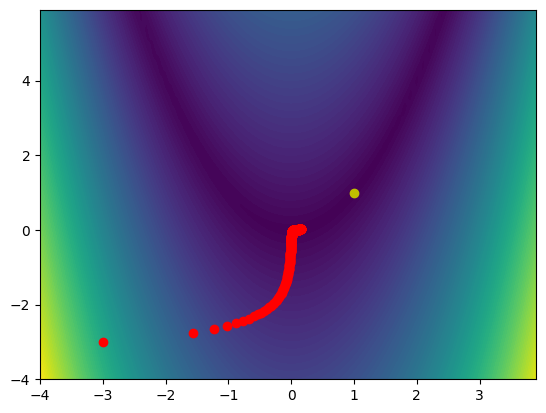

[0.15439285 0.02152821]


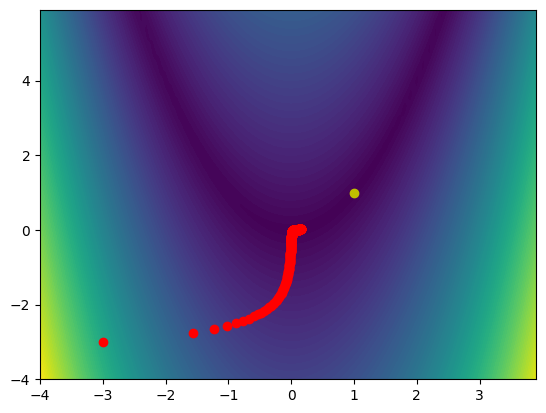

[0.15439285 0.02152821]


In [11]:
# Tensorflow implementation of SGD
print(optimize(tf.keras.optimizers.SGD(learning_rate=0.0001)))

# Your implementation of SGD
class SGD:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    parameters.assign(parameters - gradients*self.learning_rate)

print(optimize(SGD(0.0001)))

## [TODO] Gradient Descent With Momentum

Gradient descent can easily find the valley of the Rosenbrock function, but since the magnitude of the gradient is so low along the valley, gradient descent gets stuck.

With momentum, the parameters move by some fraction of the previous step along with the current gradient. This is similar to how a ball rolling down a hill will speed up over time.


$$v_t = \lambda v_{t-1} + \alpha \nabla L(\theta)$$

$$\theta_t = \theta_{t-1} - v_t$$

An additional variable $v$ is used to keep track of the velocity. When $\lambda = 0$, it's as if the ball is rolling on a frictionless surface, since it will keep all of it's previous velocity. A typical value for $\lambda$ is $0.9$.

## [TODO] Implement Gradient Descent with Momentum
Implement gradient descent with momentum below. Check to see that your implementation matches the TensorFlow implementation.

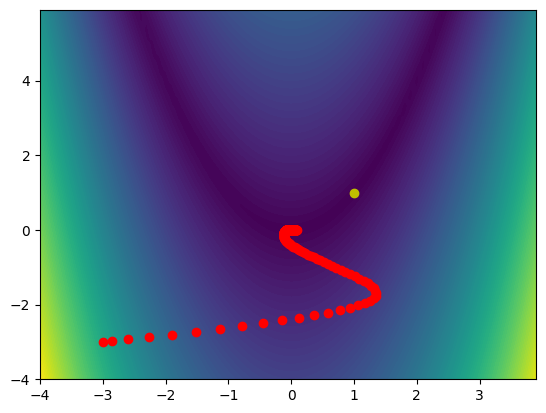

[0.08393682 0.00565819]


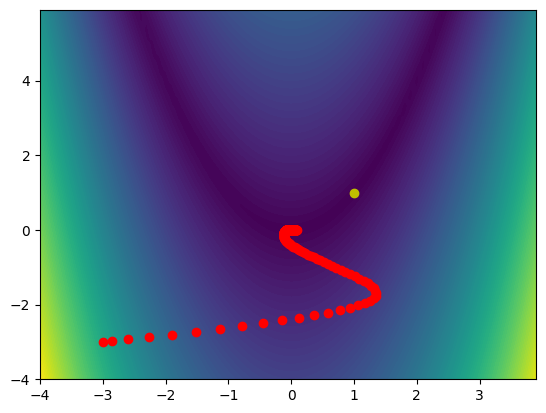

[0.08393682 0.00565819]


In [12]:
learning_rate = 0.00001
lambda_ = 0.9

# Tensorflow implementation of SGD with momentum
print(optimize(tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=lambda_)))


# Your implementation of SGD with momentum
class SGDMomentum:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.v = 0  # Zero vector for velocity
    self.lambda_ = lambda_

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]

    # TODO: Implement
    self.v = lambda_*(self.v)+gradients*self.learning_rate
    parameters.assign(parameters-self.v)

print(optimize(SGDMomentum(learning_rate=learning_rate)))

## [TODO] RMSProp

RMSProp is similar to Adagrad, but seeks to solve the problem of the decaying learning rate. Instead of storing a sum of all of the past squared gradients, RMSprop keeps a exponentially decaying running average:

The running average is updated as follows:
$$ g_t^{(i)} =  \rho g_{t-1}^{(i)} + (1 - \rho)\Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2 $$

Then, the parameter update is the same as for Adagrad. Dividing the learning rate by this exponential average will cause the learning to speed up in directions with lower gradients. This is what we want when navigating the valley of the Rosenbrock function.

$$
\theta_t^{(i)} = \theta_{t-1}^{(i)} - \frac{\alpha}{\sqrt{g^{(i)}_t} + \epsilon} * \frac{\partial}{\partial\theta^{(i)}}L(\theta_{t-1})
$$

## [TODO] Implement RMSProp
Implement RMSprop below, and check to see that your implementation matches the TensorFlow implementation:

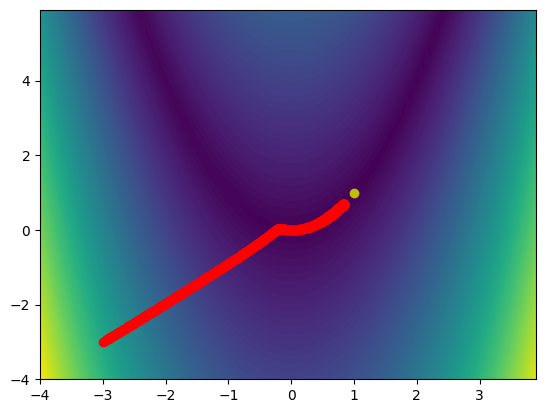

[0.84332037 0.6972173 ]


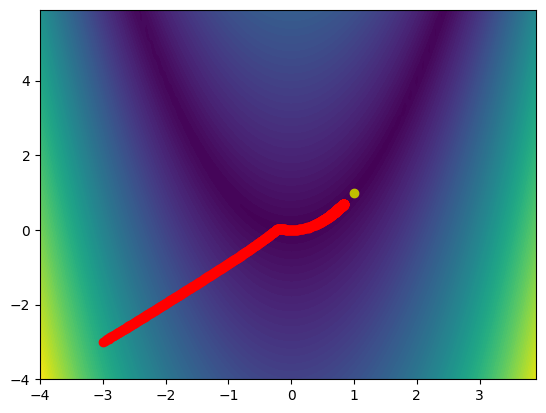

[0.8434404 0.6974192]


In [16]:
# Tensorflow implementation of RMSprop
print(optimize(tf.keras.optimizers.RMSprop(learning_rate=0.01)))

# Your implementation of RMS prop
class RMSprop:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.rho = 0.9  # Scaling factor for exponential average
    self.mean_square = 0  # Zero vector

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]

    # TODO: Implement
    self.mean_square = self.rho*self.mean_square + (1-self.rho)*tf.math.square(gradients)
    parameters.assign(parameters - (self.learning_rate/(tf.math.sqrt(self.mean_square) + self.epsilon)*gradients))

print(optimize(RMSprop(learning_rate=0.01)))


## [TODO] Adam (Adaptive Moment Estimation) Optimizer

Adam is an iteration of previous algorithms which tries to estimate the first and second moments of the gradients.

The first moment is the expected value of the gradients, and the second moment is the expected value of the square of the gradients. Adam uses exponentially decaying averages to estimate these moments based on past gradients. $\beta_1$ and $\beta_2$ are the scaling factors for the exponential average, and the default values are $\beta_1=0.9$ and $\beta_2=0.999$.

$$m^{(i)}_t = \beta_1 m_{t-1} + (1 - \beta_1) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)$$
$$v^{(i)}_t = \beta_2 v_{t-1} + (1 - \beta_2) \Big(\frac{\partial}{\partial \theta^{(i)}}L(\theta_{t-1})\Big)^2$$

However, these estimates are biased towards 0, so Adam scales them as follows:

$$\hat{m} = \frac{m}{1-\beta_1^t}$$

$$\hat{v} = \frac{v}{1-\beta_2^t}$$

(*Note:* the $t$ in the denominators of $\hat{m}$ and $\hat{v}$ is an exponentiation.)

The parameter update for Adam is then:

$$ \theta_t^{(i)} = \theta_{t-1}^{(i)} - \alpha * \frac{\hat{m}^{(i)}_t}{\sqrt{\hat{v}^{(i)}_t} + \epsilon} $$

Notice that the first moment is similar to the momentum in SGD with momentum, and the second moment is similar to the sum of squared gradients in RMSprop.

## [TODO] Implement Adam Optimizer
Implement Adam below, and check to see that your implementation matches the TensorFlow implementation.

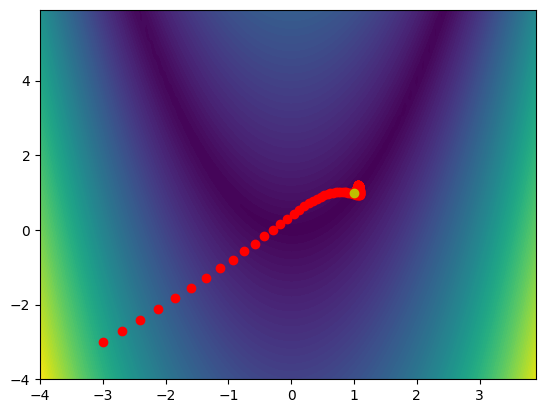

[1.0547254 1.1125664]


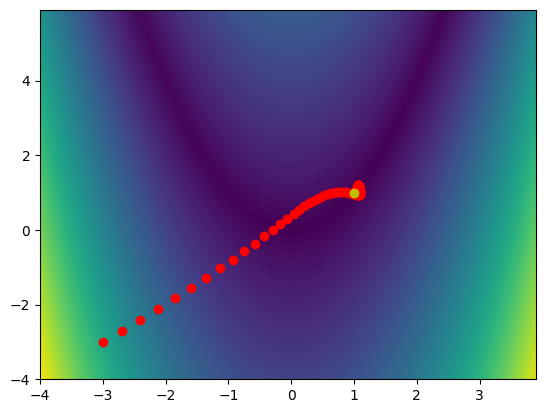

[1.0547329 1.112582 ]


In [22]:
print(optimize(tf.keras.optimizers.Adam(learning_rate=0.3)))

# Your implementation of Adam
class Adam:
  def __init__(self, learning_rate):
    self.learning_rate = learning_rate
    self.epsilon = 1e-7
    self.beta_1 = 0.9
    self.beta_2 = 0.999

    self.m = 0  # First moment zero vector
    self.v = 0  # Second moment zero vector.
    self.t = 0  # Time counter

  def apply_gradients(self, grads_and_vars):
    gradients, parameters = grads_and_vars[0]
    self.t += 1

    # TODO: Implement
    self.m = self.beta_1*self.m + (1-self.beta_1)*gradients
    self.v = self.beta_2*self.v + (1-self.beta_2)*gradients**2

    # TODO: Compute m_hat and v_hat
    m_hat = self.m/(1-self.beta_1 ** self.t)
    v_hat = self.v/(1-self.beta_2 ** self.t)
    parameters.assign(parameters - self.learning_rate*(m_hat/(tf.math.sqrt(v_hat) + self.epsilon)))

print(optimize(Adam(learning_rate=0.3)))
